In [6]:
import numpy as np

from TidalPy.RadialSolver import radial_solver, build_rs_input_homogenous_layers
from TidalPy.rheology import Maxwell, Elastic

planet_radius = 6.0e6
forcing_frequency = 2.0 * np.pi / (86400. * 1.)

density_tuple = (5500.,)
static_bulk_modulus_tuple = (150.0e9,)
static_shear_modulus_tuple = (50.0e9,)
bulk_viscosity_tuple = (1.0e28,)
shear_viscosity_tuple = (1.0e20,)
layer_type_tuple = ('solid',)
layer_is_static_tuple = (False,)
layer_is_incompressible_tuple = (False,)
shear_rheology_model_tuple = (Maxwell(),)
bulk_rheology_model_tuple = (Elastic(),)
radius_fraction_tuple = (1.0,)

rs_input = build_rs_input_homogenous_layers(
        planet_radius,
        forcing_frequency,
        density_tuple,
        static_bulk_modulus_tuple,
        static_shear_modulus_tuple,
        bulk_viscosity_tuple,
        shear_viscosity_tuple,
        layer_type_tuple,
        layer_is_static_tuple,
        layer_is_incompressible_tuple,
        shear_rheology_model_tuple,
        bulk_rheology_model_tuple,
        radius_fraction_tuple = radius_fraction_tuple,
        thickness_fraction_tuple = None,
        volume_fraction_tuple = None,
        slices_tuple = None,
        slice_per_layer = 100,
        perform_checks = True)


In [7]:
solution = radial_solver(*rs_input)

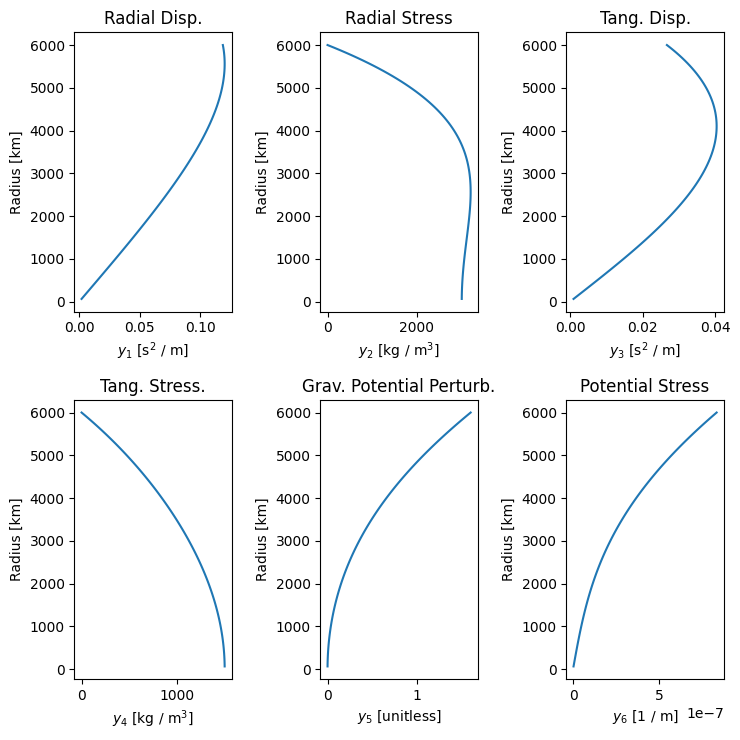

In [8]:
solution.plot

In [17]:
res = np.trapz(
    solution.density_array[1:] * (np.abs(solution.result[0, 1:])**2 + 2 * (2 + 1) * np.abs(solution.result[2, 1:])**2) * solution.radius_array[1:]**2,
    solution.radius_array[1:])

In [18]:
res

7.659534542017222e+21